In [1]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from datetime import datetime
from pandas_datareader import data as web

In [2]:
def moving_avg(price, windows=14, method='EMA'):
    ma = [np.nan] * (windows - 1)
    if method == 'SMA':
        for i in range(len(price)+1):
            if i < windows:
                continue
            mean = sum(price[i-windows:i]) / windows
            ma.append(mean)
    if method == 'EMA':
        if len(price) < 2 * windows:
            raise ValueError("Data is too short")
        alpha = 2.0 / (windows + 1)
        mean = sum(price[:windows]) / windows
        ma.append(mean)
        ma.append((price[windows] - mean) * alpha + mean)
        j = windows
        for p in price[windows+1:]:
            mean = (p - ma[j]) * alpha + ma[j]
            j += 1
            ma.append(mean)
    if method == 'WMA':
        weights = np.arange(14, 0, -1)
        denominator = (windows * (windows + 1) / 2)
        for i in range(len(price)+1):
            if i < windows:
                continue
            mean = np.sum(weights * price[i-windows:i]) / denominator
            ma.append(mean)
    return ma

In [3]:
s, e = datetime(2017, 1, 1), datetime(2017, 12, 31)
hk0321 = web.DataReader('0321.HK', 'yahoo', s, e)

In [4]:
hk0321 = hk0321.fillna(method='ffill')

In [5]:
hk0321.shape

(247, 6)

In [6]:
hk0321['SMA14_diy'] = moving_avg(hk0321['Adj Close'], method='SMA')
hk0321['WMA14_diy'] = moving_avg(hk0321['Adj Close'], method='WMA')
hk0321['EMA14_diy'] = moving_avg(hk0321['Adj Close'], method='EMA')

In [7]:
hk0321['SMA'] = hk0321['Adj Close'].rolling(window=14).mean()
hk0321['EMA'] = hk0321['Adj Close'].ewm(com=14).mean()

In [8]:
hk0321[12:20]

,Open,High,Low,Close,Adj Close,Volume,SMA14_diy,WMA14_diy,EMA14_diy,SMA,EMA
Date,,,,,,,,,,,
2017-01-19,5.10,5.10,5.01,5.01,4.468950,880000.0,NaN,NaN,NaN,NaN,4.488386
2017-01-20,5.02,5.03,4.99,5.01,4.468950,2163057.0,4.486153,4.484497,4.486153,4.486153,4.486294
2017-01-23,5.03,5.04,4.97,4.99,4.451110,1206000.0,4.488702,4.494267,4.481481,4.488702,4.482656
2017-01-24,5.02,5.07,5.00,5.06,4.513551,1262000.0,4.494436,4.502422,4.485757,4.494436,4.485738
2017-01-25,5.08,5.08,4.97,4.98,4.442190,1438000.0,4.491251,4.503017,4.479948,4.491251,4.481533
2017-01-26,5.00,5.02,4.95,4.95,4.415430,2695422.0,4.484242,4.499109,4.471346,4.484242,4.475337
2017-01-27,4.96,5.01,4.96,4.98,4.442190,4699136.0,4.477233,4.490698,4.467458,4.477233,4.472311
2017-02-01,4.98,5.00,4.95,5.00,4.460031,1498878.0,4.471499,4.481523,4.466468,4.471499,4.471217


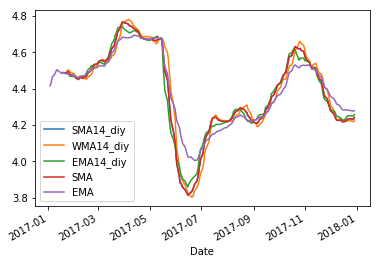

In [9]:
hk0321[['SMA14_diy', 'WMA14_diy', 'EMA14_diy', 'SMA', 'EMA']].plot()
plt.legend()
plt.show()